In [246]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [247]:
df=pd.read_csv('gapminder1.csv')

In [248]:
y = df['life'].values
X = df['fertility'].values


In [249]:
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (10111,)
Dimensions of X before reshaping: (10111,)
Dimensions of y after reshaping: (10111, 1)
Dimensions of X after reshaping: (10111, 1)


In [250]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [251]:
df = df.dropna()

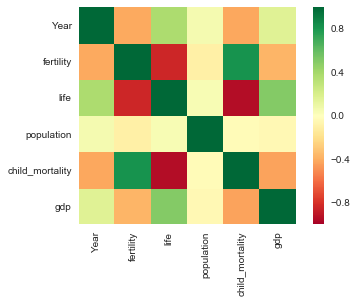

In [252]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [253]:
 df['life'].mean()

63.576686370078775

In [254]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8836 entries, 0 to 10100
Data columns (total 8 columns):
Country            8836 non-null object
Year               8836 non-null int64
fertility          8836 non-null float64
life               8836 non-null float64
population         8836 non-null float64
child_mortality    8836 non-null float64
gdp                8836 non-null float64
region             8836 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 621.3+ KB


In [255]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [256]:
df.head()

Country  Year  fertility    life  population  child_mortality     gdp  \
0  Afghanistan  1964      7.671  33.639  10474903.0            339.7  1182.0   
1  Afghanistan  1965      7.671  34.152  10697983.0            334.1  1182.0   
2  Afghanistan  1966      7.671  34.662  10927724.0            328.7  1168.0   
3  Afghanistan  1967      7.671  35.170  11163656.0            323.3  1173.0   
4  Afghanistan  1968      7.671  35.674  11411022.0            318.1  1187.0   

       region  
0  South Asia  
1  South Asia  
2  South Asia  
3  South Asia  
4  South Asia

In [257]:
enc=OneHotEncoder()

In [258]:
lbl=LabelEncoder()

In [259]:
X=df.drop('life',axis=1)

In [260]:
X=X.drop('Country',axis=1)

In [261]:
X=X.drop('region',axis=1)
X=X.drop('Year',axis=1)

In [262]:
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X=preprocess_features(X)

In [263]:
X.head()

fertility  population  child_mortality     gdp
0      7.671  10474903.0            339.7  1182.0
1      7.671  10697983.0            334.1  1182.0
2      7.671  10927724.0            328.7  1168.0
3      7.671  11163656.0            323.3  1173.0
4      7.671  11411022.0            318.1  1187.0

In [264]:
y=df['life']

In [265]:
print(X.isnull().sum())

fertility          0
population         0
child_mortality    0
gdp                0
dtype: int64


In [266]:
X

fertility  population  child_mortality     gdp
0          7.671  10474903.0            339.7  1182.0
1          7.671  10697983.0            334.1  1182.0
2          7.671  10927724.0            328.7  1168.0
3          7.671  11163656.0            323.3  1173.0
4          7.671  11411022.0            318.1  1187.0
5          7.671  11676990.0            313.0  1178.0
6          7.671  11964906.0            307.8  1174.0
7          7.671  12273101.0            302.1  1092.0
8          7.671  12593688.0            296.4  1046.0
9          7.671  12915499.0            290.8  1137.0
10         7.671  13223928.0            284.9  1170.0
11         7.671  13505544.0            279.4  1201.0
12         7.670  13766792.0            273.6  1231.0
13         7.670  14003408.0            267.8  1119.0
14         7.670  14179656.0            261.6  1179.0
15         7.669  14249493.0            255.5  1155.0
16         7.669  14185729.0            249.1  1158.0
17         7.670  13984092.0            242.7  1284.0
18         7.671  13672870.0            236.2  1402.0
19         7.673  13300056.0            229.7  1454.0
20         7.676  12931791.0            222.9  1429.0
21         7.679  12625292.0            216.0  1384.0
22         7.681  12372113.0            209.2  1486.0
23         7.682  12183387.0            202.1  1230.0
24         7.682  12156685.0            195.0  1113.0
25         7.682  12414686.0            187.8  1087.0
26         7.687  13032161.0            181.0  1028.0
27         7.700  14069854.0            174.2  1022.0
28         7.725  15472076.0            167.8   941.0
29         7.758  17053213.0            162.0   810.0
...          ...         ...              ...     ...
10071      6.435   8523090.0             81.5  2327.0
10072      6.223   8855279.0             76.9  2395.0
10073      6.004   9189169.0             72.8  2357.0
10074      5.784   9523376.0             69.8  2299.0
10075      5.569   9852244.0             68.0  2390.0
10076      5.365  10169188.0             67.5  2436.0
10077      5.176  10469202.0             68.3  2532.0
10078      5.001  10748215.0             70.1  2604.0
10079      4.840  11005690.0             72.9  2316.0
10080      4.690  11244552.0             76.0  2292.0
10081      4.554  11469872.0             79.2  2456.0
10082      4.432  11684693.0             82.0  2416.0
10083      4.328  11891290.0             84.2  2619.0
10084      4.240  12086519.0             85.7  2645.0
10085      4.169  12261742.0             86.8  2680.0
10086      4.112  12405236.0             87.8  2625.0
10087      4.069  12509477.0             88.7  2521.0
10088      4.039  12575015.0             89.5  2540.0
10089      4.018  12607791.0             90.6  2304.0
10090      4.002  12612956.0             92.0  1908.0
10091      3.987  12597877.0             94.1  1794.0
10092      3.969  12570686.0             96.2  1689.0
10093      3.941  12529655.0             97.9  1629.0
10094      3.903  12481245.0             98.7  1568.0
10095      3.853  12451543.0             98.3  1286.0
10096      3.792  12473992.0             97.3  1352.0
10097      3.721  12571454.0             95.1  1484.0
10098      3.643  12754378.0             92.0  1626.0
10099      3.564  13013678.0             86.7  1750.0
10100      3.486  13327925.0             83.3  1773.0

[8836 rows x 4 columns]

In [267]:
from sklearn import preprocessing

In [268]:
X_scaled = preprocessing.scale(X)

In [269]:
X_scaled.view()

array([[  1.75069252e+00,  -1.64510524e-01,   3.21269727e+00,
         -6.41856588e-01],
       [  1.75069252e+00,  -1.62483215e-01,   3.14256307e+00,
         -6.41856588e-01],
       [  1.75069252e+00,  -1.60395372e-01,   3.07493368e+00,
         -6.42638105e-01],
       ..., 
       [ -2.21884336e-01,  -1.43795085e-01,   1.10511669e-01,
         -6.17071338e-01],
       [ -2.60571916e-01,  -1.41438616e-01,   4.41346662e-02,
         -6.10149331e-01],
       [ -2.98769779e-01,  -1.38582798e-01,   1.55319250e-03,
         -6.08865411e-01]])

In [270]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [271]:
reg_all=linear_model.LinearRegression()

In [272]:
reg_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [276]:
reg_all.score(X_train,y_train)

0.90879255738185216

In [273]:
y_pred=reg_all.predict(X_test)

In [274]:
from sklearn.metrics import mean_squared_error

In [275]:
mean_squared_error(y_test,y_pred)

12.487777746275075